<a href="https://colab.research.google.com/github/banned-from-uni/SWELL-DL/blob/main/SWELL-1D-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1: Gather & Store Data

In [ ]:
train = pd.read_csv('/content/drive/My Drive/SWELL/train.csv').drop('datasetId',axis=1)
test = pd.read_csv('/content/drive/My Drive/SWELL/test.csv').drop('datasetId',axis=1)

## Part 2: Clean & Organize Data

In [ ]:
swell = pd.concat([train,test], axis=0)

## Part 3: Exploratory Data Analysis

### What does the dataset look like?

In [ ]:
swell

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,no stress


### How are the labels distributed?

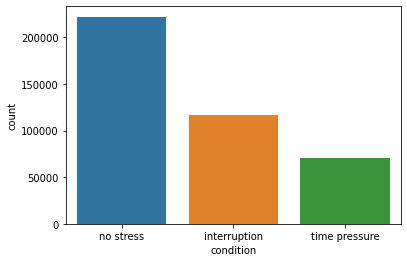

In [ ]:
sns.countplot(data=swell,x='condition');

### Why does the 'no stress' *condition* have a higher *heart rate* than the stress *conditions*?

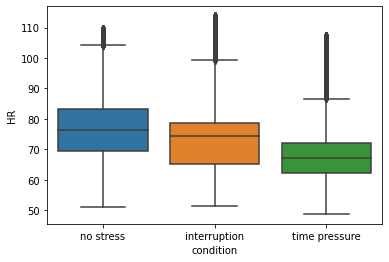

In [ ]:
sns.boxplot(data=swell,x='condition',y='HR');

### How are the variables correlated?

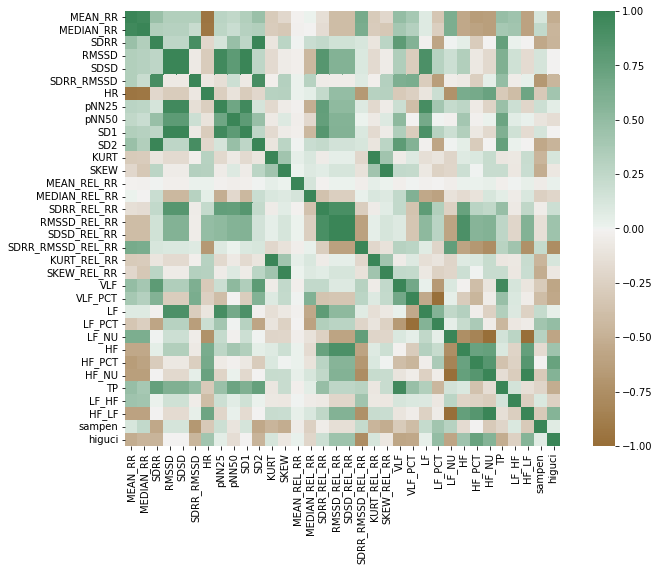

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(
swell.corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
);

## Part 4: Machine Learning

### Feature Selection

### 1D CNN

In [ ]:
X = swell.drop('condition',axis=1).to_numpy()
y = swell['condition']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
print(y.unique())
y = encoder.fit_transform(y)
print(np.unique(y))

['no stress' 'interruption' 'time pressure']
[0 1 2]


In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X.shape)
print(y.shape)

(410322, 34)
(410322,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=123)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(X_train[0][0])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[0][0])

836.6399952866666
0.3733296518304481


In [ ]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)

(328257, 34)
(328257, 34, 1)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

def create_model():
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
  model.add(Dense(16, activation="relu"))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = "adam",
                metrics = ['accuracy'])

  return model

In [ ]:
model = create_model()
history = model.fit(X_train, y_train, batch_size=64,
          epochs=600, verbose = 1,
          validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
5130/5130 [==============================] - 29s 5ms/step - loss: 0.7607 - accuracy: 0.6637 - val_loss: 0.6520 - val_accuracy: 0.7120
Epoch 2/600
5130/5130 [==============================] - 23s 5ms/step - loss: 0.6098 - accuracy: 0.7352 - val_loss: 0.5865 - val_accuracy: 0.7598
Epoch 3/600
5130/5130 [==============================] - 23s 5ms/step - loss: 0.5449 - accuracy: 0.7668 - val_loss: 0.5477 - val_accuracy: 0.7442
Epoch 4/600
5130/5130 [==============================] - 24s 5ms/step - loss: 0.4976 - accuracy: 0.7901 - val_loss: 0.4742 - val_accuracy: 0.7924
Epoch 5/600
5130/5130 [==============================] - 23s 5ms/step - loss: 0.4606 - accuracy: 0.8083 - val_loss: 0.4431 - val_accuracy: 0.8047
Epoch 6/600
5130/5130 [==============================] - 23s 5ms/step - loss: 0.4302 - accuracy: 0.8225 - val_loss: 0.4354 - val_accuracy: 0.8177
Epoch 7/600
5130/5130 [==============================] - 22s 4ms/step - loss: 0.4048 - accuracy: 0.8348 - val_loss: 0.3866 -

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Loss:", loss, " Accuracy:", accuracy)

10259/10259 [==============================] - 17s 2ms/step - loss: 0.1016 - accuracy: 0.9632
Loss: 0.10163738578557968  Accuracy: 0.9631995558738708


In [ ]:
pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)

[[22703   305   205]
 [ 1458 42517   645]
 [  277   185 13770]]


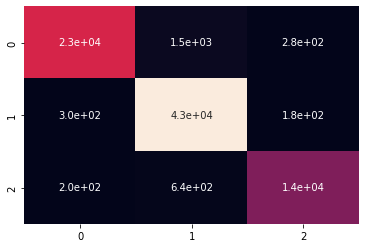

In [ ]:
print(cm)
sns.heatmap(cm.T, annot=True, cbar = False);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     23213
           1       0.99      0.95      0.97     44620
           2       0.94      0.97      0.95     14232

    accuracy                           0.96     82065
   macro avg       0.95      0.97      0.96     82065
weighted avg       0.96      0.96      0.96     82065



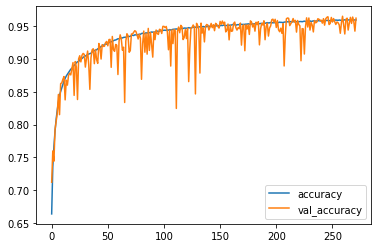

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy','val_accuracy']].plot();

In [ ]:
pred = model.predict(X_test[:30])
pred_y = pred.argmax(axis=-1)
print('Predicted:',pred_y)
print('Actual:   ',y_test[:30])

Predicted: [1 0 1 1 0 1 2 2 0 1 0 1 1 2 2 1 1 1 0 2 1 1 1 0 1 0 1 0 1 0]
Actual:    [1 0 1 1 0 1 2 2 0 1 0 1 1 2 2 1 1 1 0 2 1 1 1 0 1 0 1 0 1 0]


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 33, 64)            192       
                                                                 
 dense_2 (Dense)             (None, 33, 16)            1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16, 16)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
____________________________________________________